In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_test=pd.read_excel('/content/test_lAUu6dG.xlsx')
data_train=pd.read_excel('/content/train_ctrUa4K.xlsx')

**TEST**

In [ ]:
data_test.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
data_test.shape

(367, 12)

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test_num_cols = data_test._get_numeric_data().columns

In [ ]:
test_num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [ ]:
test_cat =[i for i in data_test.columns if i not in test_num_cols]

In [ ]:
test_cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
for test_num_colsnum_cols in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  data_test[num_cols]=data_test[num_cols].fillna(data_test[num_cols].median())

In [ ]:
data_test['Gender']

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
362    Male
363    Male
364    Male
365    Male
366    Male
Name: Gender, Length: 367, dtype: object

In [ ]:
data_test['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [ ]:
data_test['Gender']=data_test['Gender'].fillna(data_test['Gender'].mode()[0])

In [ ]:
data_test['Dependents']=data_test['Dependents'].fillna(data_test['Dependents'].mode()[0])

In [ ]:
data_test['Self_Employed']=data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0])

In [ ]:
data_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
Q1=np.percentile(data_test['LoanAmount'],25,method = 'midpoint')
Q2=np.percentile(data_test['LoanAmount'],50,method = 'midpoint')
Q3=np.percentile(data_test['LoanAmount'],75,method = 'midpoint')
print (Q1)
print(Q2)
print(Q3)

101.0
125.0
157.5


In [ ]:
IQR= Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

min is 16.25
max is 242.25


In [ ]:
outlier =[]
for x in data_test['LoanAmount']:
  if ((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [ ]:
outlier

[280.0,
 300.0,
 290.0,
 275.0,
 360.0,
 257.0,
 390.0,
 256.0,
 300.0,
 550.0,
 260.0,
 336.0,
 412.0,
 460.0,
 297.0,
 300.0,
 260.0,
 254.0]

In [ ]:
Q1=np.percentile(data_test['ApplicantIncome'],25,method = 'midpoint')
Q2=np.percentile(data_test['ApplicantIncome'],50,method = 'midpoint')
Q3=np.percentile(data_test['ApplicantIncome'],75,method = 'midpoint')
print (Q1)
print(Q2)
print(Q3)

2864.0
3786.0
5060.0


In [ ]:
IQR= Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

min is -430.0
max is 8354.0


In [ ]:
outlier =[]
for x in data_test['ApplicantIncome']:
  if ((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [ ]:
outlier

[13633,
 12173,
 9226,
 72529,
 8449,
 13518,
 9719,
 12500,
 32000,
 10890,
 12941,
 8703,
 15312,
 10166,
 9167,
 13083,
 10000,
 8706,
 14911,
 10000,
 18840,
 24797,
 29167,
 9000,
 10000,
 8750,
 14987,
 16000,
 9699,
 8667,
 8550,
 9200]

In [ ]:
test_cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

<ipython-input-269-9a5ac599f6d5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_test.corr(),annot=True)


<Axes: >

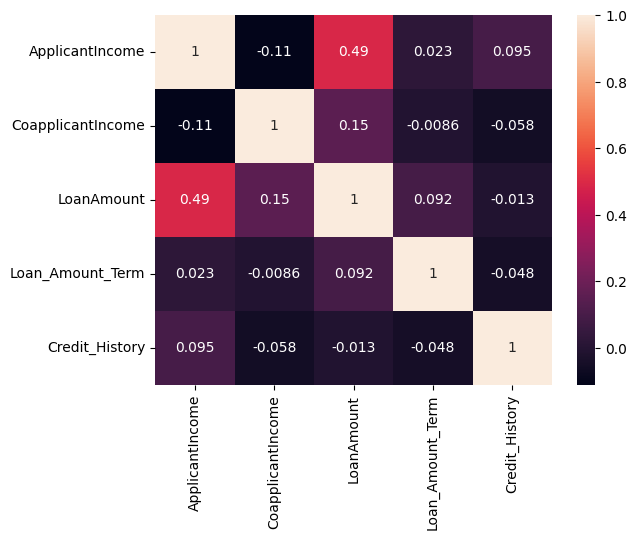

In [ ]:
sns.heatmap(data_test.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data_test['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data_test['Gender']= le.fit_transform(data_test['Gender'])

In [ ]:
data_test['Gender'].unique()

array([1, 0])

In [ ]:
data_test['Education']= le.fit_transform(data_test['Education'])

In [ ]:
data_test['Married']= le.fit_transform(data_test['Married'])

In [ ]:
data_test['Self_Employed']= le.fit_transform(data_test['Self_Employed'])

In [ ]:
data_test['Property_Area']= le.fit_transform(data_test['Property_Area'])

In [ ]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [ ]:
data_test['Loan_ID'].nunique()

367

In [ ]:
data_test.drop(['Loan_ID'],axis=1,inplace = True)

In [ ]:
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [ ]:
from sklearn import preprocessing

In [ ]:
minmax = preprocessing.MinMaxScaler(feature_range = (0,1))

In [ ]:
data_test['LoanAmount'] =le.fit_transform(data_test['LoanAmount'])

In [ ]:
data_test['ApplicantIncome']= le.fit_transform(data_test['ApplicantIncome'])

In [ ]:
columns_with_strings = [col for col in data_test.columns if data_test[col].apply(type).eq(str).any()]

In [ ]:
columns_with_strings

['Dependents']

In [ ]:
data_test['Dependents'].unique()

array([0, 1, 2, '3+'], dtype=object)

In [ ]:
data_test['Dependents'] = data_test['Dependents'].replace('3+', 3)

In [ ]:
x = minmax.fit_transform(data_test)
data_test = pd.DataFrame(x)

In [ ]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.0,0.000000,0.0,0.0,0.801917,0.000000,0.363636,0.746835,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.325879,0.062500,0.468531,0.746835,1.0,1.0
2,1.0,1.0,0.666667,0.0,0.0,0.734824,0.075000,0.832168,0.746835,1.0,1.0
3,1.0,1.0,0.666667,0.0,0.0,0.137380,0.106083,0.293706,0.746835,1.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.383387,0.000000,0.174825,0.746835,1.0,1.0


**TRAIN DATASET**

In [ ]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data_train.shape

(614, 13)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_num_cols = data_train._get_numeric_data().columns

In [ ]:
train_num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [ ]:
train_cat =[i for i in data_train.columns if i not in train_num_cols]

In [ ]:
train_cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
for train_num_cols in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  data_train[train_num_cols]=data_train[train_num_cols].fillna(data_train[train_num_cols].median())

In [ ]:
data_train['Gender']=data_train['Gender'].fillna(data_train['Gender'].mode()[0])

In [ ]:
data_train['Dependents']=data_train['Dependents'].fillna(data_train['Dependents'].mode()[0])

In [ ]:
data_train['Self_Employed']=data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0])

In [ ]:
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data_train['Gender']= le.fit_transform(data_train['Gender'])

In [ ]:
data_train['Education']= le.fit_transform(data_train['Education'])

In [ ]:
data_train['Married']= le.fit_transform(data_train['Married'])

In [ ]:
data_train['Self_Employed']= le.fit_transform(data_train['Self_Employed'])

In [ ]:
data_train['Property_Area']= le.fit_transform(data_train['Property_Area'])

In [ ]:
data_train['Loan_Status']= le.fit_transform(data_train['Loan_Status'])

In [ ]:
data_train.drop(['Loan_ID'],axis=1,inplace = True)

In [ ]:
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
columns_with_strings = [col for col in data_train.columns if data_train[col].apply(type).eq(str).any()]

In [ ]:
columns_with_strings

['Dependents']

In [ ]:
data_train['Dependents'] = data_train['Dependents'].replace('3+', 3)

In [ ]:
from sklearn import preprocessing

In [ ]:
minmax = preprocessing.MinMaxScaler(feature_range = (0,1))

In [ ]:
data_train['LoanAmount'] =le.fit_transform(data_train['LoanAmount'])

In [ ]:
data_train['ApplicantIncome']= le.fit_transform(data_train['ApplicantIncome'])

In [ ]:
data_train['CoapplicantIncome']= le.fit_transform(data_train['CoapplicantIncome'])

In [ ]:
x = data_train.drop(['Loan_Status'],axis=1)
y = data_train['Loan_Status']
x_train = x
y_train = y
x_test = data_test

In [ ]:
X = minmax.fit_transform(x)
data_train = pd.DataFrame(X)

In [ ]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.000000,0.0,0.0,0.746032,0.000000,0.400990,0.74359,1.0,1.0
1,1.0,0.5,0.333333,0.0,0.0,0.607143,0.209790,0.400990,0.74359,1.0,0.0
2,1.0,0.5,0.000000,0.0,1.0,0.275794,0.000000,0.128713,0.74359,1.0,1.0
3,1.0,0.5,0.000000,1.0,0.0,0.178571,0.559441,0.361386,0.74359,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.755952,0.000000,0.465347,0.74359,1.0,1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_cls = DecisionTreeClassifier(max_depth=2)
model = dt_cls.fit(x_train,y_train)
y_pred_dt = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_dt

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [368]:
submission=pd.read_excel('/content/sample_submission_49d68Cx.xlsx')

In [369]:
submission['prediction'] = y_pred_dt

In [370]:
submission

,Loan_ID,Loan_Status,prediction
0,LP001015,N,1
1,LP001022,N,1
2,LP001031,N,1
3,LP001035,N,1
4,LP001051,N,1
...,...,...,...
362,LP002971,N,1
363,LP002975,N,1
364,LP002980,N,1
365,LP002986,N,1


In [371]:
submission['Loan_Status'] = ['Y' if  y_pred_dt == 1 else 'N' for  y_pred_dt in  y_pred_dt]

In [372]:
submission

,Loan_ID,Loan_Status,prediction
0,LP001015,Y,1
1,LP001022,Y,1
2,LP001031,Y,1
3,LP001035,Y,1
4,LP001051,Y,1
...,...,...,...
362,LP002971,Y,1
363,LP002975,Y,1
364,LP002980,Y,1
365,LP002986,Y,1


In [377]:
submission=submission.drop(['prediction'],axis=1)

In [379]:
 submission.to_csv('submission.csv',index=False)